In [1]:
from google.colab import drive
drive.mount("/content/Drive")

Mounted at /content/Drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/Drive/MyDrive/datos/examencovid354.csv")

print(data)

Ejercicio 2
        Inciso a)

Columna Age of Subject: Percentiles: {0: 7.0, 25: 17.0, 50: 20.0, 75: 21.0, 100: 59.0}, Cuartiles: (17.0, 20.0, 21.0)
Columna Time spent on Online Class: Percentiles: {0: 0.0, 25: 2.0, 50: 3.0, 75: 5.0, 100: 10.0}, Cuartiles: (2.0, 3.0, 5.0)
Columna Time spent on self study: Percentiles: {0: 0.0, 25: 2.0, 50: 2.0, 75: 4.0, 100: 18.0}, Cuartiles: (2.0, 2.0, 4.0)
Columna Time spent on fitness: Percentiles: {0: 0.0, 25: 0.0, 50: 1.0, 75: 1.0, 100: 5.0}, Cuartiles: (0.0, 1.0, 1.0)
Columna Time spent on sleep: Percentiles: {0: 4.0, 25: 7.0, 50: 8.0, 75: 9.0, 100: 15.0}, Cuartiles: (7.0, 8.0, 9.0)
Columna Time spent on social media: Percentiles: {0: 0.0, 25: 1.0, 50: 2.0, 75: 3.0, 100: 10.0}, Cuartiles: (1.0, 2.0, 3.0)
Columna Time spent on TV: Percentiles: {0: 0.0, 25: 0.0, 50: 1.0, 75: 2.0, 100: 15.0}, Cuartiles: (0.0, 1.0, 2.0)
Columna Number of meals per day: Percentiles: {0: 1.0, 25: 2.0, 50: 3.0, 75: 3.0, 100: 8.0}, Cuartiles: (2.0, 3.0, 3.0)


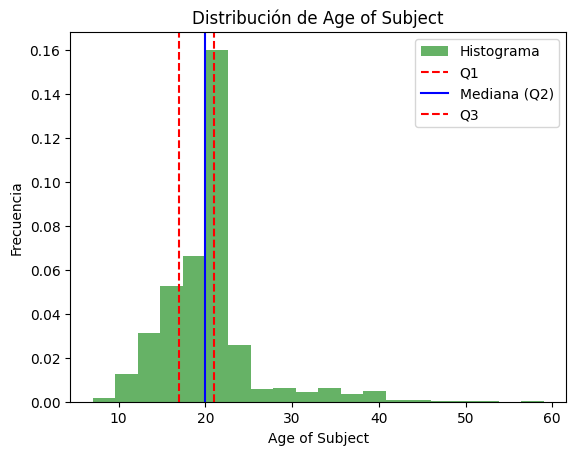

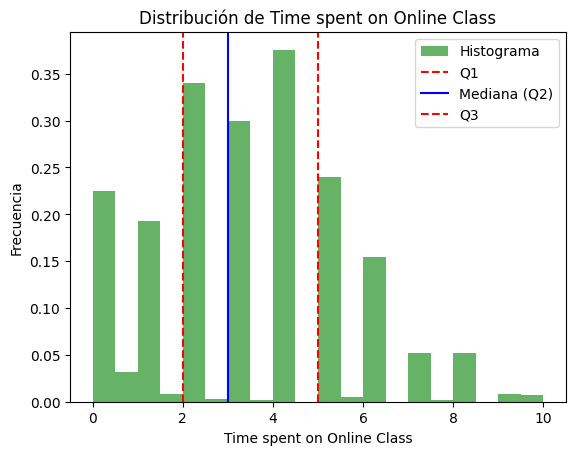

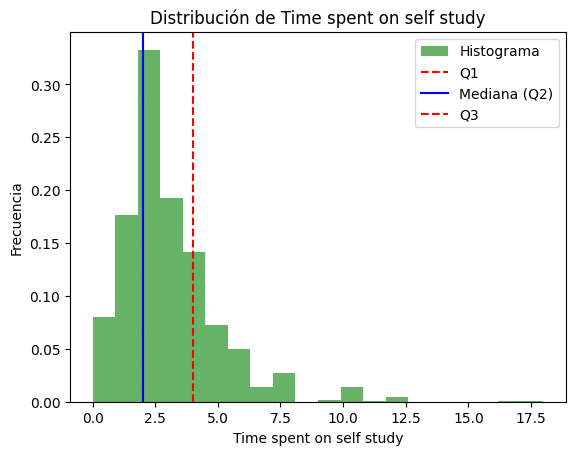

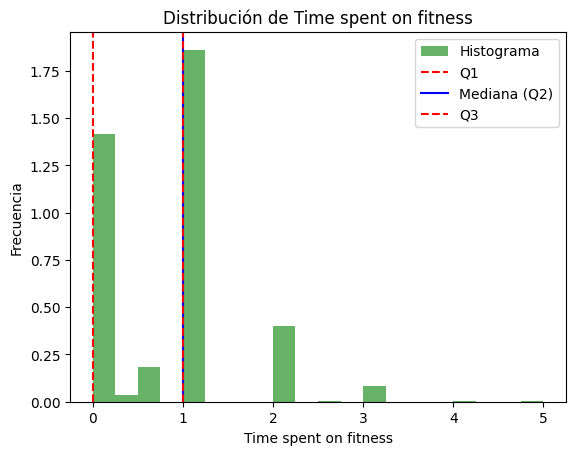

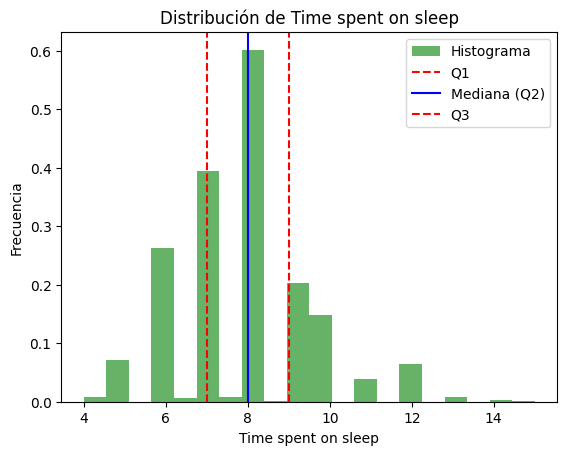

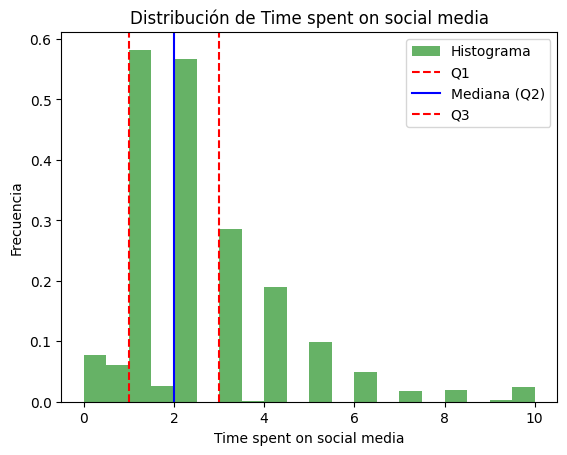

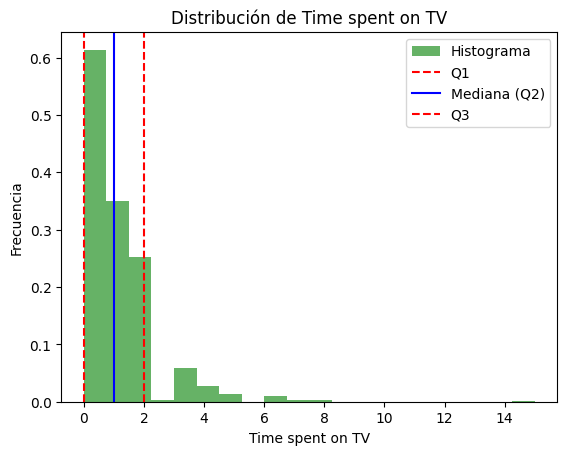

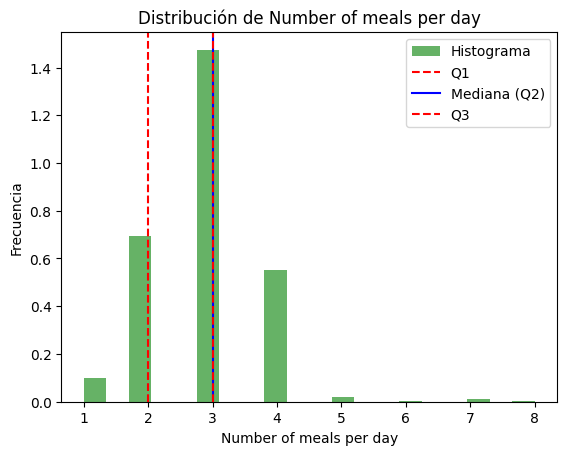

Propuesta de distribución para Age of Subject:
- Distribución Normal o Gaussiana, si los datos parecen seguir una curva de campana.
Propuesta de distribución para Time spent on Online Class:
- Distribución Normal o Gaussiana, si los datos parecen seguir una curva de campana.
Propuesta de distribución para Time spent on self study:
- Distribución Normal o Gaussiana, si los datos parecen seguir una curva de campana.
Propuesta de distribución para Time spent on fitness:
- Distribución Normal o Gaussiana, si los datos parecen seguir una curva de campana.
Propuesta de distribución para Time spent on sleep:
- Distribución Normal o Gaussiana, si los datos parecen seguir una curva de campana.
Propuesta de distribución para Time spent on social media:
- Distribución Normal o Gaussiana, si los datos parecen seguir una curva de campana.
Propuesta de distribución para Time spent on TV:
- Distribución Normal o Gaussiana, si los datos parecen seguir una curva de campana.
Propuesta de distribución pa

In [4]:
import csv
import matplotlib.pyplot as plt

# Función para calcular percentil
def calcular_percentil(datos, percentil):
    datos_ordenados = sorted(datos)
    indice = (len(datos_ordenados) - 1) * percentil / 100
    inferior = int(indice)
    superior = inferior + 1
    if superior >= len(datos_ordenados):
        return datos_ordenados[inferior]
    else:
        peso_superior = indice - inferior
        return datos_ordenados[inferior] * (1 - peso_superior) + datos_ordenados[superior] * peso_superior

# Función para calcular cuartiles
def calcular_cuartiles(datos):
    return calcular_percentil(datos, 25), calcular_percentil(datos, 50), calcular_percentil(datos, 75)

# Leer el archivo CSV
with open('/content/Drive/MyDrive/datos/examencovid354.csv', newline='') as archivo_csv:
    lector = csv.reader(archivo_csv)
    columnas = next(lector)  # Nombres de columnas
    datos_por_columna = {columna: [] for columna in columnas}

    for fila in lector:
        for i, valor in enumerate(fila):
            try:
                datos_por_columna[columnas[i]].append(float(valor))
            except ValueError:
                continue  # Ignorar valores no numéricos

# Calcular percentiles y cuartiles para cada columna
percentiles = {}
cuartiles = {}
for columna, datos in datos_por_columna.items():
    if datos:
        percentiles[columna] = {p: calcular_percentil(datos, p) for p in range(0, 101, 25)}  # Percentiles 0, 25, 50, 75, 100
        cuartiles[columna] = calcular_cuartiles(datos)
        print(f"Columna {columna}: Percentiles: {percentiles[columna]}, Cuartiles: {cuartiles[columna]}")

# Graficar los datos
for columna, datos in datos_por_columna.items():
    if datos:
        plt.figure()
        plt.hist(datos, bins=20, density=True, alpha=0.6, color='g', label='Histograma')
        plt.axvline(x=cuartiles[columna][0], color='r', linestyle='--', label='Q1')
        plt.axvline(x=cuartiles[columna][1], color='b', linestyle='-', label='Mediana (Q2)')
        plt.axvline(x=cuartiles[columna][2], color='r', linestyle='--', label='Q3')
        plt.title(f"Distribución de {columna}")
        plt.xlabel(columna)
        plt.ylabel("Frecuencia")
        plt.legend()
        plt.show()

# Propuestas de distribuciones
for columna, datos in datos_por_columna.items():
    if datos:
        media = sum(datos) / len(datos)
        print(f"Propuesta de distribución para {columna}:")

        if all(x == 0 or x == 1 for x in datos):  # Datos binarios
            print(f"- Bernoulli, basada en valores binarios (0/1).")
        elif all(isinstance(x, int) and x >= 0 for x in datos):  # Datos discretos
            print(f"- Poisson o Binomial, si se trata de conteos.")
        else:  # Datos continuos
            print(f"- Distribución Normal o Gaussiana, si los datos parecen seguir una curva de campana.")

Ejercicio2
        Inciso b)

Estadísticas descriptivas:
       Age of Subject  Time spent on self study  Time spent on sleep
count     1182.000000               1182.000000          1182.000000
mean        20.165821                  2.911591             7.871235
std          5.516467                  2.140590             1.615762
min          7.000000                  0.000000             4.000000
25%         17.000000                  2.000000             7.000000
50%         20.000000                  2.000000             8.000000
75%         21.000000                  4.000000             9.000000
max         59.000000                 18.000000            15.000000


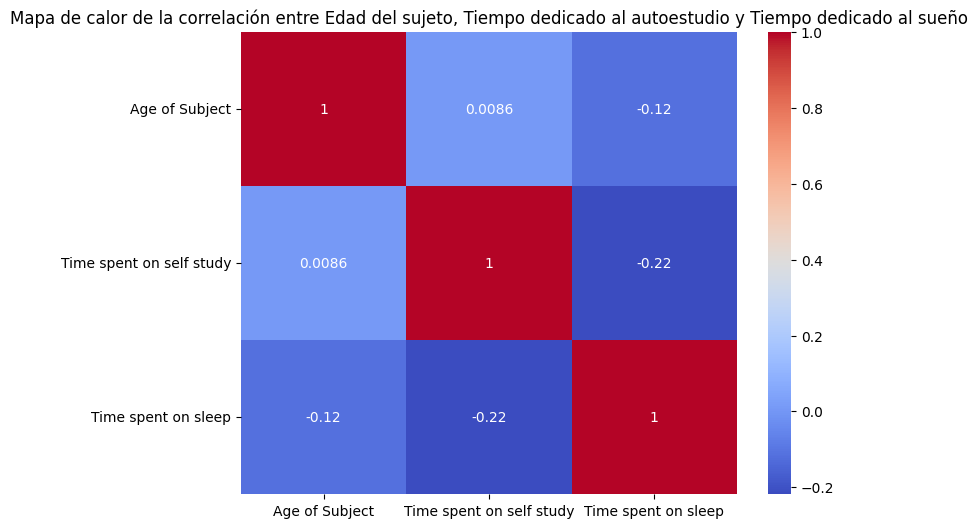

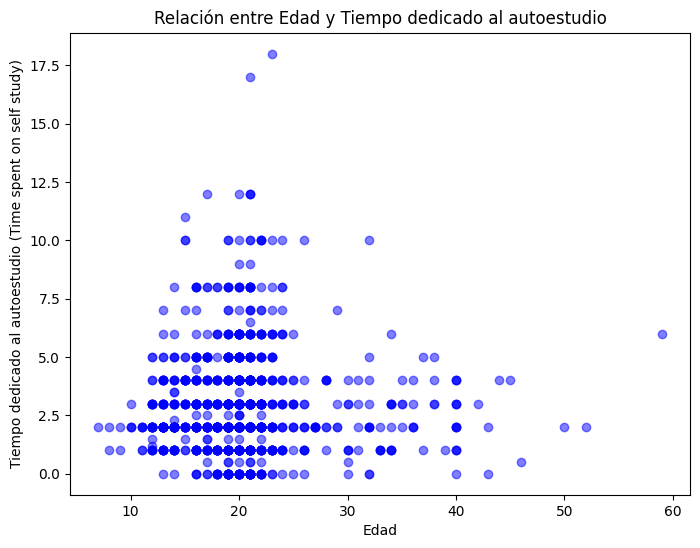

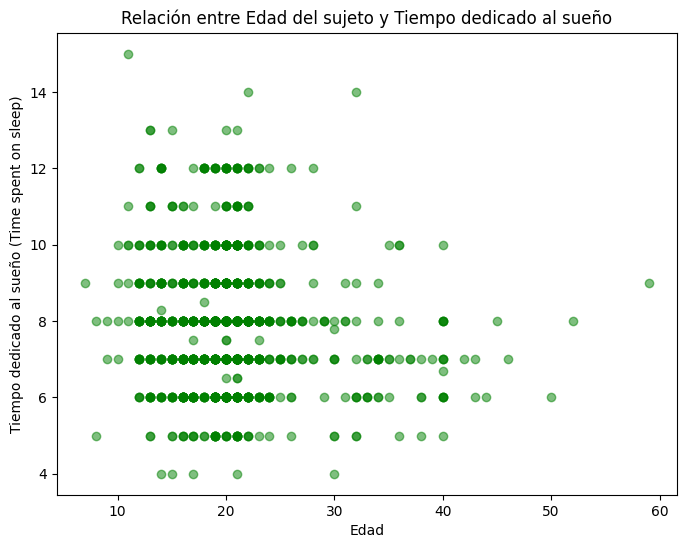

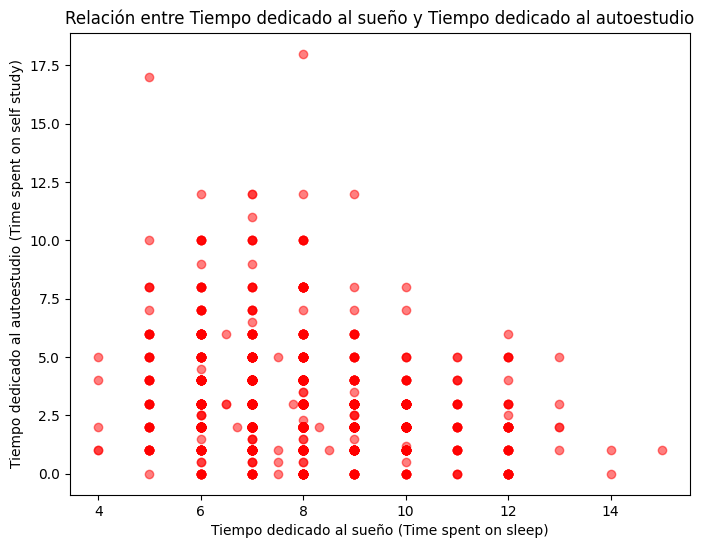

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
data = pd.read_csv("/content/Drive/MyDrive/datos/examencovid354.csv")

# Selección de las columnas
df_seleccionadas = data[['Age of Subject', 'Time spent on self study', 'Time spent on sleep']]

# 1. Estadísticas descriptivas de las columnas seleccionadas
print("Estadísticas descriptivas:")
print(df_seleccionadas.describe())

# 2. Graficar la relación entre las columnas seleccionadas

# Mapa de calor para ver la correlación entre las tres columnas
plt.figure(figsize=(8, 6))
sns.heatmap(df_seleccionadas.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre Edad del sujeto, Tiempo dedicado al autoestudio y Tiempo dedicado al sueño')
plt.show()

# Gráfico de dispersión entre Edad del sujeto y Tiempo dedicado al autoestudio
plt.figure(figsize=(8, 6))
plt.scatter(df_seleccionadas['Age of Subject'], df_seleccionadas['Time spent on self study'], color='blue', alpha=0.5)
plt.title('Relación entre Edad y Tiempo dedicado al autoestudio')
plt.xlabel('Edad')
plt.ylabel('Tiempo dedicado al autoestudio (Time spent on self study)')
plt.show()

# Gráfico de dispersión entre Edad del sujeto y Tiempo dedicado al sueño
plt.figure(figsize=(8, 6))
plt.scatter(df_seleccionadas['Age of Subject'], df_seleccionadas['Time spent on sleep'], color='green', alpha=0.5)
plt.title('Relación entre Edad del sujeto y Tiempo dedicado al sueño')
plt.xlabel('Edad')
plt.ylabel('Tiempo dedicado al sueño (Time spent on sleep)')
plt.show()

# Gráfico de dispersión entre Tiempo dedicado al sueño y Tiempo dedicado al autoestudio
plt.figure(figsize=(8, 6))
plt.scatter(df_seleccionadas['Time spent on sleep'], df_seleccionadas['Time spent on self study'], color='red', alpha=0.5)
plt.title('Relación entre Tiempo dedicado al sueño y Tiempo dedicado al autoestudio')
plt.xlabel('Tiempo dedicado al sueño (Time spent on sleep)')
plt.ylabel('Tiempo dedicado al autoestudio (Time spent on self study)')
plt.show()

Ejercicio 2
        Inciso C)

Para la columna Age of Subject:
Media: 20.165820642978005
Mediana: 20.0
Moda: 20

Para la columna Time spent on self study:
Media: 2.911590524534687
Mediana: 2.0
Moda: 2.0

Para la columna Time spent on sleep:
Media: 7.871235194585448
Mediana: 8.0
Moda: 8.0



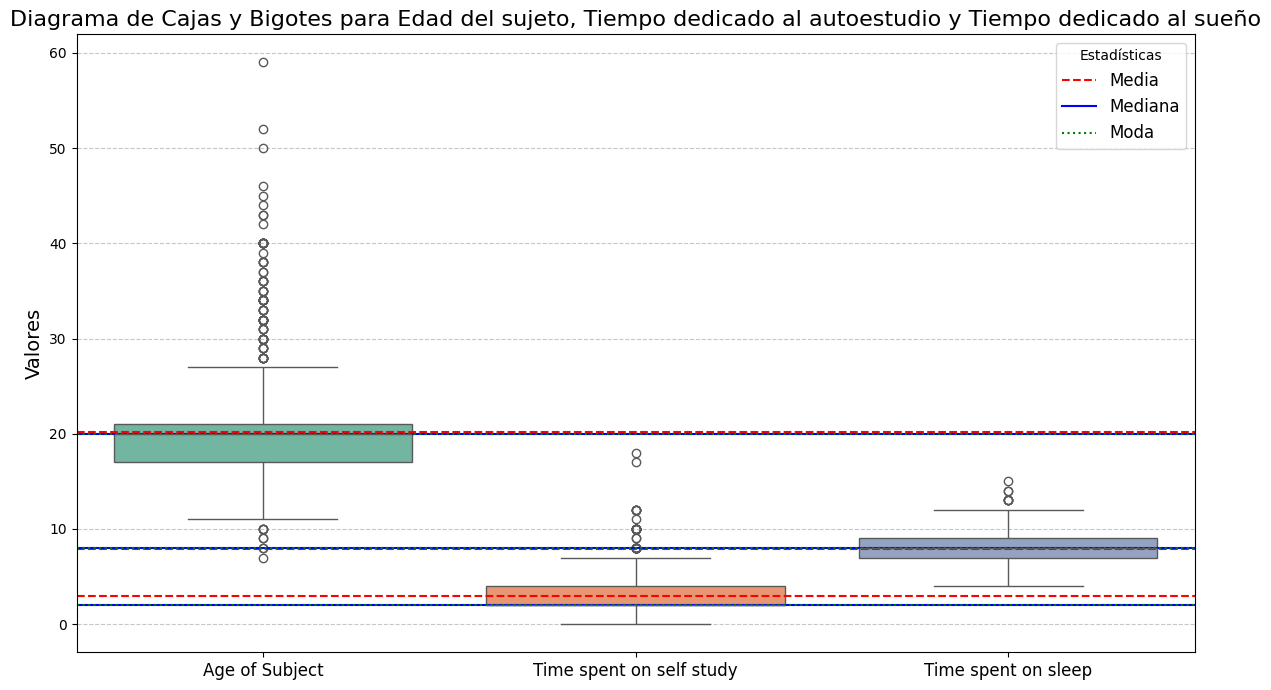

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cargar el archivo CSV
data = pd.read_csv("/content/Drive/MyDrive/datos/examencovid354.csv")

# Seleccionar las columnas de interés
columnas_seleccionadas = ['Age of Subject', 'Time spent on self study', 'Time spent on sleep']
df = data[columnas_seleccionadas]

# 1. Obtener la media, mediana, y moda de las columnas seleccionadas
estadisticas = {}
for col in columnas_seleccionadas:
    media = df[col].mean()
    mediana = df[col].median()
    moda = df[col].mode().iloc[0]  # Asegúrate de usar iloc para obtener el primer valor de la moda
    estadisticas[col] = {'media': media, 'mediana': mediana, 'moda': moda}

    print(f"Para la columna {col}:")
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")
    print(f"Moda: {moda}")
    print()

# 2. Graficar diagrama de cajas y bigotes (boxplot)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, palette="Set2")  # Añadir una paleta para hacer el gráfico más colorido

# Añadir líneas para la media, mediana y moda
for i, col in enumerate(columnas_seleccionadas):
    media = estadisticas[col]['media']
    mediana = estadisticas[col]['mediana']
    moda = estadisticas[col]['moda']

    plt.axhline(y=media, color='red', linestyle='--', label='Media' if i == 0 else "")
    plt.axhline(y=mediana, color='blue', linestyle='-', label='Mediana' if i == 0 else "")
    plt.axhline(y=moda, color='green', linestyle=':', label='Moda' if i == 0 else "")

# Personalización del gráfico
plt.title('Diagrama de Cajas y Bigotes para Edad del sujeto, Tiempo dedicado al autoestudio y Tiempo dedicado al sueño', fontsize=16)
plt.ylabel('Valores', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula solo en el eje y
plt.legend(title='Estadísticas', fontsize=12)
plt.tight_layout()  # Ajustar automáticamente el espacio
plt.show()